In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.2 installed at /home/mr.bwolfe/.conda/envs/redmapper/lib/python3.7/site-packages/camb


In [3]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0, nrun=-0.01)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [4]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0, nrun=-0.01)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

Note: redshifts have been re-sorted (earliest first)


In [5]:
print(results.get_sigma8())

[0.53168871 0.80055982]


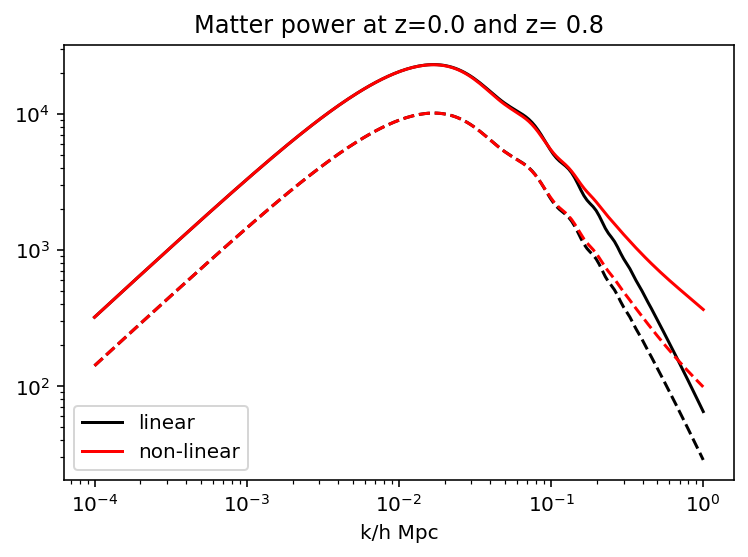

In [6]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

In [7]:
transfer_zs=np.linspace(0,9.8,50)

In [8]:
results = camb.get_transfer_functions(pars)

In [9]:
Tk=results.get_matter_transfer_data()

In [10]:
transfer_zs[40]

8.0

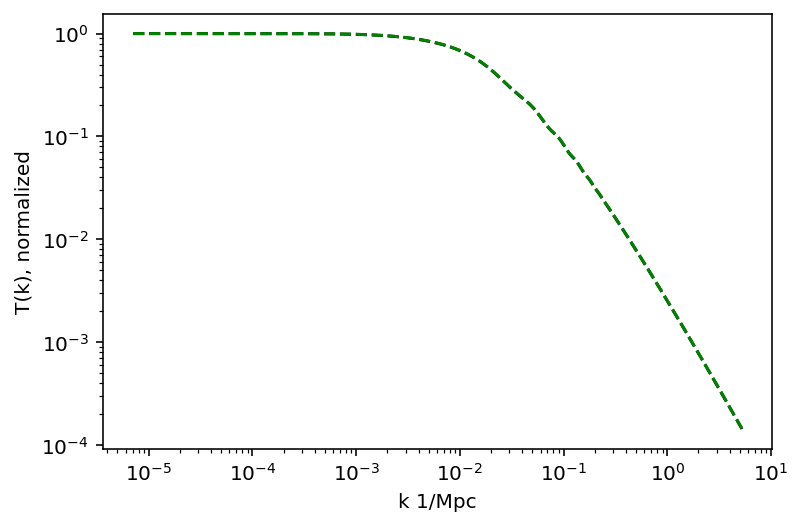

In [12]:
plt.loglog(Tk.q, Tk.transfer_z('delta_tot',40)/np.max(Tk.transfer_z('delta_tot',40)), color='k', ls = line)
plt.loglog(Tk.q, Tk.transfer_z('delta_tot',20)/np.max(Tk.transfer_z('delta_tot',20)), color='g', ls = line)

plt.ylabel('T(k), normalized');
plt.xlabel('k 1/Mpc');

In [154]:
from skypy import power_spectrum

In [155]:
from astropy.cosmology import FlatLambdaCDM
cosmology = FlatLambdaCDM(H0=67.04, Om0=0.3183, Ob0=0.047745)

zs=np.linspace(0,20,1000)
f=power_spectrum.growth_factor(zs, cosmology)
Om0=0.3183
Ob0=0.047745
Or0=8e-5
OL0=1-Om0-Or0

In [156]:
import scipy.special as sc

In [157]:
a=1/(1+zs)

In [158]:
integral=sc.hyp2f1(5/6, 3/2, 11/6, -OL0*a**3/Om0)*2*a**(5/2)/(5*Om0*np.sqrt(OL0*a**3+Om0))

In [159]:
D1=np.sqrt(OL0*a**3+Om0)/a**(3/2)*integral/0.4

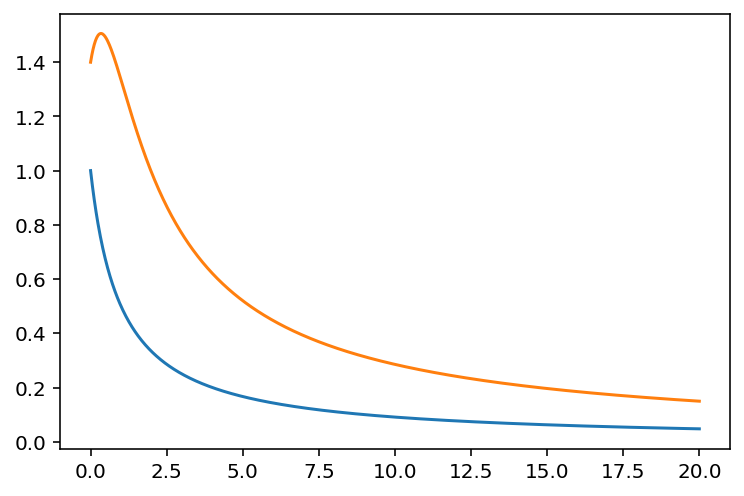

In [160]:
plt.plot(zs,1/(1+zs))
plt.plot(zs,D1)

In [161]:
import scipy.integrate as integrate


In [162]:
def integrand(x,L,R,M):  #a is a parameter, x is the variable I want to integrate over

    return x**(3/2)/(L*x**3+R*x+M)**3/2

In [163]:
@np.vectorize
def myquad(a,OL0,Om0,Or0):
    return integrate.quad(integrand,0,a,args=(OL0,Or0,Om0))[0]

In [164]:
integral=myquad(a,OL0,Om0,Or0)

In [165]:
prefix=np.sqrt(OL0*a**3+Om0+Or0*a)**(1/2)/a**(3/2)

In [166]:
D2=prefix*integral/0.2
D2

array([7.81481453, 7.91787603, 8.0176944 , 8.11416263, 8.20718415,
       8.29667335, 8.38255602, 8.46476961, 8.54326338, 8.6179984 ,
       8.68894743, 8.7560947 , 8.81943562, 8.87897631, 8.93473321,
       8.98673245, 9.03500936, 9.07960775, 9.12057935, 9.15798308,
       9.1918844 , 9.22235466, 9.2494704 , 9.2733127 , 9.29396659,
       9.3115204 , 9.3260652 , 9.33769425, 9.34650247, 9.35258598,
       9.35604163, 9.35696658, 9.35545794, 9.35161241, 9.34552599,
       9.33729365, 9.32700913, 9.31476468, 9.30065089, 9.28475654,
       9.2671684 , 9.24797116, 9.22724731, 9.20507709, 9.18153836,
       9.15670664, 9.13065502, 9.10345416, 9.07517229, 9.0458752 ,
       9.01562628, 8.98448651, 8.95251452, 8.91976661, 8.88629679,
       8.85215684, 8.81739635, 8.78206275, 8.74620142, 8.7098557 ,
       8.67306698, 8.63587473, 8.59831659, 8.5604284 , 8.52224431,
       8.48379678, 8.44511669, 8.40623336, 8.36717466, 8.32796701,
       8.28863546, 8.24920378, 8.20969445, 8.17012876, 8.13052

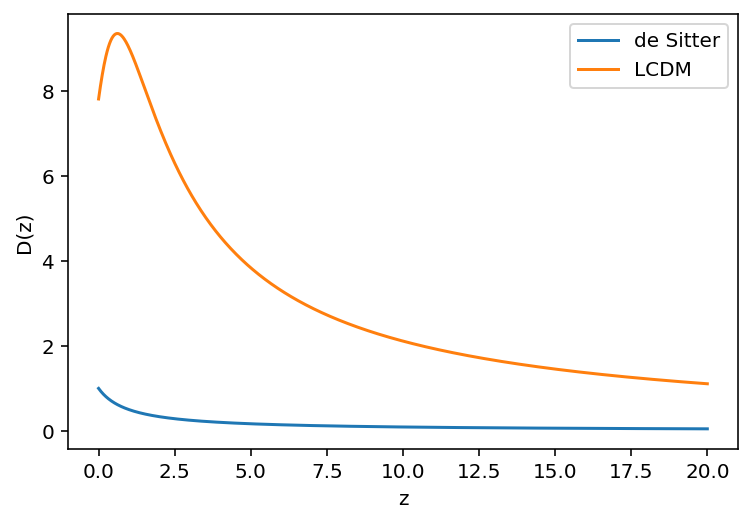

In [167]:
plt.plot(zs,1/(1+zs))
plt.plot(zs,D2)

plt.ylabel('D(z)');
plt.xlabel('z');
plt.legend(['de Sitter','LCDM'], loc='upper right');

In [168]:
m_per_inveV = 1.9732705e-7
m_per_Mpc = 3.0856776e22
km_per_Mpc = m_per_Mpc/1e3
s_per_inveV = 6.5821220e-16

m_per_inveV/m_per_Mpc

6.394934130513181e-30

In [169]:
((100/km_per_Mpc*s_per_inveV)/(m_per_inveV/m_per_Mpc))**2

1.1126500935344398e-07

In [170]:
from scipy.constants import c

In [171]:
c_Mpc=c/m_per_Mpc

In [172]:
H0_inv_sec=100/km_per_Mpc

In [173]:
h_over_k_sq=(H0_inv_sec/c_Mpc)**2

In [174]:
delta_c=1.686

In [175]:
def myquad(a,OL0,Om0,Or0):
    return integrate.quad(integrand,0,a,args=(OL0,Or0,Om0))[0]

In [176]:
z=0.8
a=1/(1+z)
integral=myquad(a,OL0,Om0,Or0)
prefix=np.sqrt(OL0*a**3+Om0+Or0*a)**(1/2)/a**(3/2)
growth_factor = prefix*integral/0.2
growth_factor

9.26790337372034

In [177]:
f_NL = 5
b1 = 2
h = 0.675

In [178]:
Tk_normed=Tk.transfer_z('delta_tot',40)/np.max(Tk.transfer_z('delta_tot',40))

In [179]:
Tk_kh=Tk.transfer_z('k/h',40)

In [180]:
just_k=Tk_kh*h

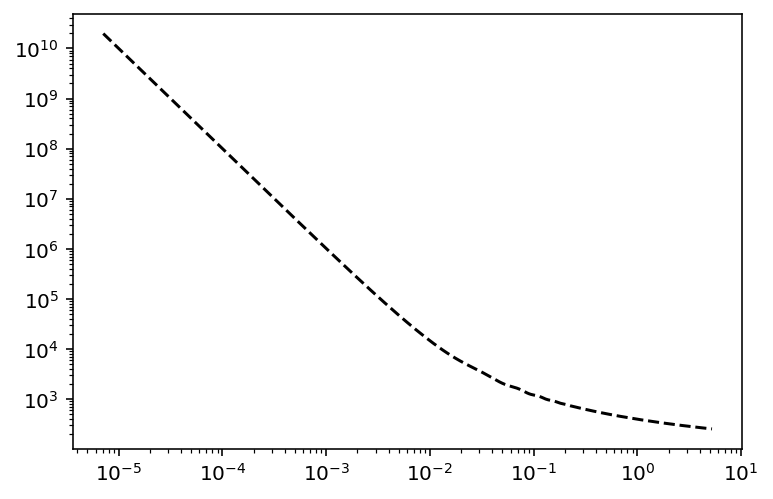

In [181]:
plt.loglog(Tk.q, 1/Tk.q**2/Tk_normed, color='k', ls = line)

In [182]:
z=0.8
a=1/(1+z)
H=h*H0_inv_sec*np.sqrt(Or0*a**-4+Om0*a**-3+OL0)
1/(c_Mpc/H)

0.0003587534338365781

In [183]:
delta_b = f_NL*(b1-1)*delta_c*3*Om0*h**2/growth_factor*h_over_k_sq/just_k**2/Tk_normed

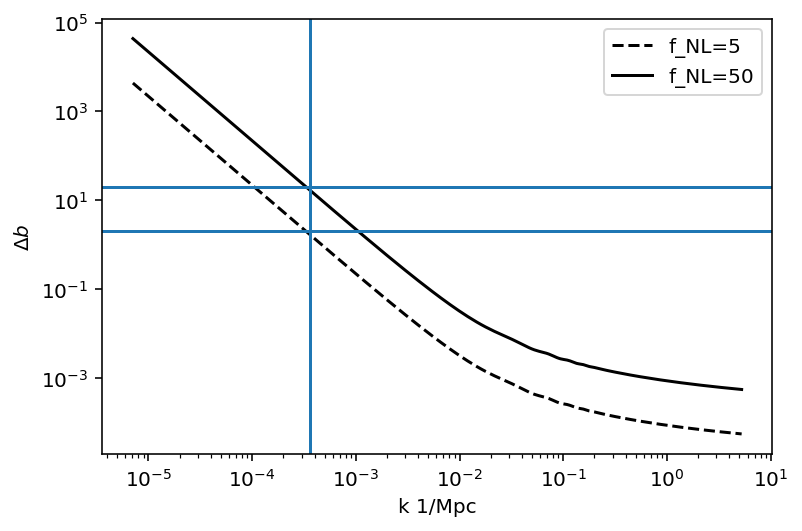

In [184]:
f_NL=5
delta_b = f_NL*(b1-1)*delta_c*3*Om0*h**2/growth_factor*h_over_k_sq/just_k**2/Tk_normed/0.2
plt.loglog(Tk.q, delta_b, color='k', ls = line)

f_NL=50
delta_b = f_NL*(b1-1)*delta_c*3*Om0*h**2/growth_factor*h_over_k_sq/just_k**2/Tk_normed/0.2

plt.loglog(Tk.q, delta_b, color='k', ls = '-')
plt.axvline(1/(c_Mpc/H))
plt.axhline(2)
plt.axhline(20)
plt.ylabel('$\Delta b$');
plt.xlabel('k 1/Mpc');
plt.legend(['f_NL=5','f_NL=50'], loc='upper right');

In [202]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0, nrun=-0.01)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.8], kmax=np.max(Tk.transfer_z('k/h',40)))

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)

In [197]:
#Ugh! the transfer data is at different k's. Need to interpolate on the given k's above

In [198]:
import scipy.interpolate as interpolate

In [203]:
f = interpolate.interp1d(just_k/h, Tk_normed, kind='cubic')

In [204]:
f(kh)

array([0.99990338, 0.99989388, 0.99988351, 0.99987214, 0.99985965,
       0.99984596, 0.99983096, 0.99981453, 0.99979653, 0.99977677,
       0.99975505, 0.99973122, 0.99970515, 0.99967664, 0.99964539,
       0.9996111 , 0.99957349, 0.99953226, 0.99948709, 0.99943765,
       0.99938351, 0.9993242 , 0.99925924, 0.99918806, 0.99911013,
       0.99902489, 0.99893163, 0.9988296 , 0.99871798, 0.99859594,
       0.99846254, 0.99831678, 0.99815753, 0.9979836 , 0.99779372,
       0.99758657, 0.99736071, 0.99711456, 0.9968464 , 0.99655443,
       0.99623671, 0.99589126, 0.99551596, 0.99510853, 0.99466651,
       0.99418735, 0.99366842, 0.99310695, 0.99250008, 0.99184479,
       0.99113788, 0.99037603, 0.98955588, 0.98867397, 0.98772656,
       0.98670983, 0.98561976, 0.98445229, 0.98320306, 0.98186761,
       0.98044119, 0.97891886, 0.97729543, 0.97556552, 0.97372354,
       0.97176371, 0.96968012, 0.96746677, 0.96511759, 0.9626263 ,
       0.95998664, 0.95719216, 0.95423651, 0.95111312, 0.94781

In [205]:
f_NL=5
delta_b = f_NL*(b1-1)*delta_c*3*Om0*h**2/growth_factor*h_over_k_sq/(kh*h)**2/f(kh)/0.2
b = b1+delta_b

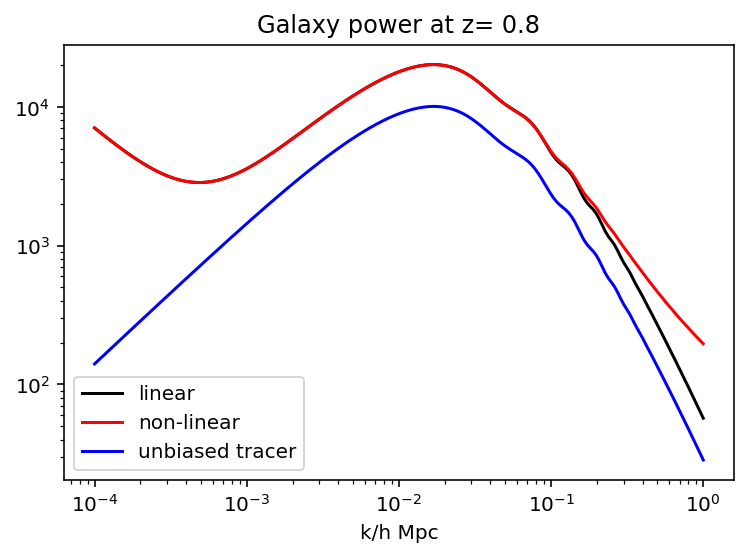

In [210]:
for i, (redshift, line) in enumerate(zip(z,['-'])):
    plt.loglog(kh,b* pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, b*pk_nonlin[i,:], color='r', ls = line)
    
for i, (redshift, line) in enumerate(zip(z,['-'])):
    plt.loglog(kh,pk[i,:], color='b', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear', 'unbiased tracer'], loc='lower left');
plt.title('Galaxy power at z= %s'%tuple(z));